In [1]:
import pandas as pd
import numpy as np
from gurobipy import *
from datetime import datetime

In [2]:
GHP = pd.read_csv("Gro_handelspreise_201901010000_201912312359.csv", sep = ";",decimal=',')
GHP["DatumUhrzeit"] = GHP["Datum"] + " "+  GHP["Uhrzeit"]
GHP.set_index("DatumUhrzeit", inplace = True)
GHP.rename(columns={'Deutschland/Luxemburg[€/MWh]': 'DeutschlandLuxenburg'}, inplace=True)
GHP.head()

,Datum,Uhrzeit,DeutschlandLuxenburg,∅ Anrainer DE/LU[€/MWh],Belgien[€/MWh],Dänemark 1[€/MWh],Dänemark 2[€/MWh],Frankreich[€/MWh],Niederlande[€/MWh],Norwegen 2[€/MWh],Österreich[€/MWh],Polen[€/MWh],Schweden 4[€/MWh],Schweiz[€/MWh],Tschechien[€/MWh],DE/AT/LU[€/MWh],Italien (Nord)[€/MWh],Slowenien[€/MWh],Ungarn[€/MWh]
DatumUhrzeit,,,,,,,,,,,,,,,,,,,
01.01.2019 00:00,01.01.2019,00:00,28.32,-,69.49,28.32,28.32,51.00,68.92,48.77,33.48,-,28.32,50.26,"8,5",-,51.00,51.00,"59,9"
01.01.2019 01:00,01.01.2019,01:00,10.07,-,66.58,10.07,10.07,46.27,64.98,49.25,39.76,-,10.07,48.74,"3,97",-,46.27,46.27,"52,71"
01.01.2019 02:00,01.01.2019,02:00,-4.08,-,65.07,-4.08,-4.08,39.78,60.27,49.17,39.78,-,10.03,47.24,"4,7",-,39.78,39.78,"36,49"
01.01.2019 03:00,01.01.2019,03:00,-9.91,-,52.17,-9.91,-9.91,27.87,49.97,48.37,27.87,-,4.56,36.29,"0,93",-,27.87,27.87,"31,24"
01.01.2019 04:00,01.01.2019,04:00,-7.41,-,47.66,-7.41,-7.41,23.21,47.66,47.19,-0.36,-,4.83,30.09,"3,9",-,22.00,-0.36,"25,98"


<AxesSubplot:xlabel='DatumUhrzeit'>

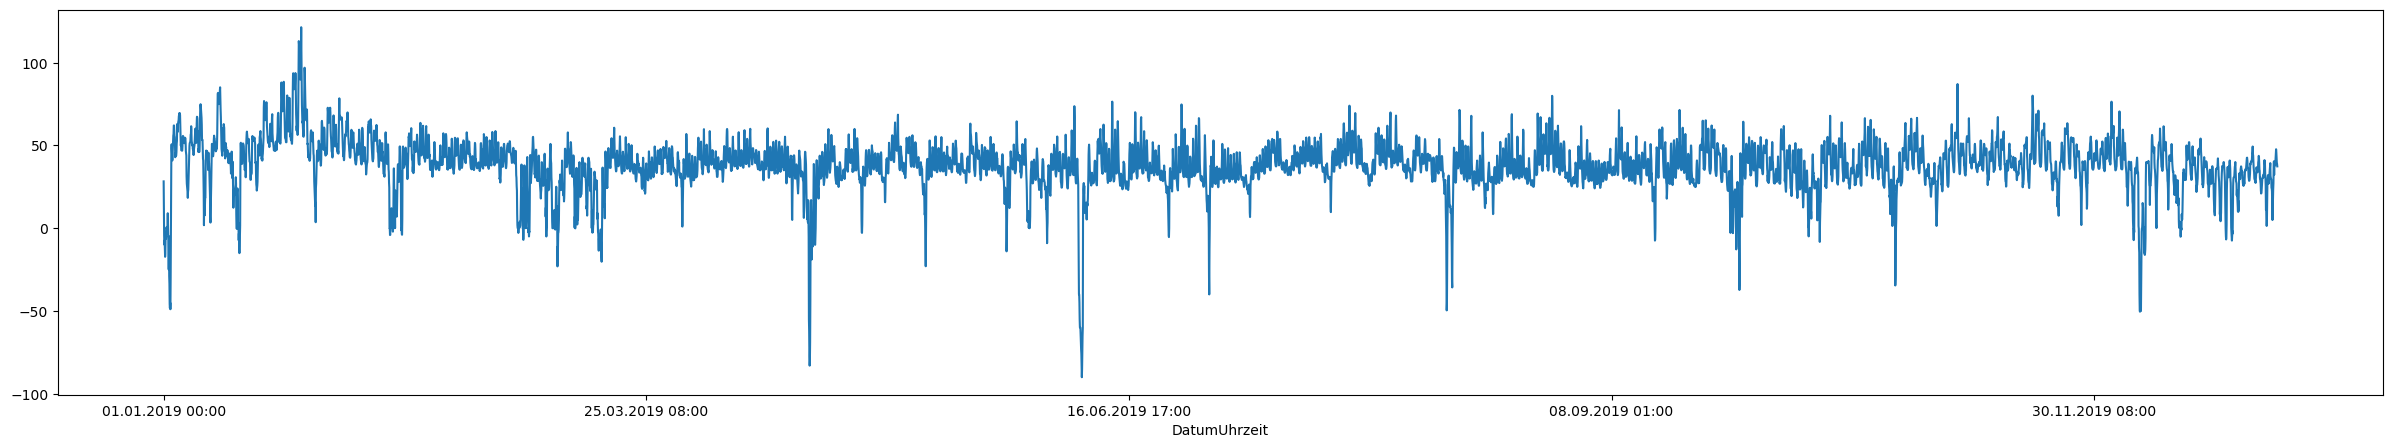

In [3]:
GHP["DeutschlandLuxenburg"].plot(figsize = (30 ,5))

In [4]:
PV = pd.read_csv("ninja_pv_49.0069_8.4034_corrected.csv", sep = ",")
PV.set_index("local_time in Europe/Berlin", inplace = True)
PV.head()

,time in UTC,electricityinkW
local_time in Europe/Berlin,,
2019-01-01 01:00,2019-01-01 00:00,0.0
2019-01-01 02:00,2019-01-01 01:00,0.0
2019-01-01 03:00,2019-01-01 02:00,0.0
2019-01-01 04:00,2019-01-01 03:00,0.0
2019-01-01 05:00,2019-01-01 04:00,0.0


<AxesSubplot:xlabel='local_time in Europe/Berlin'>

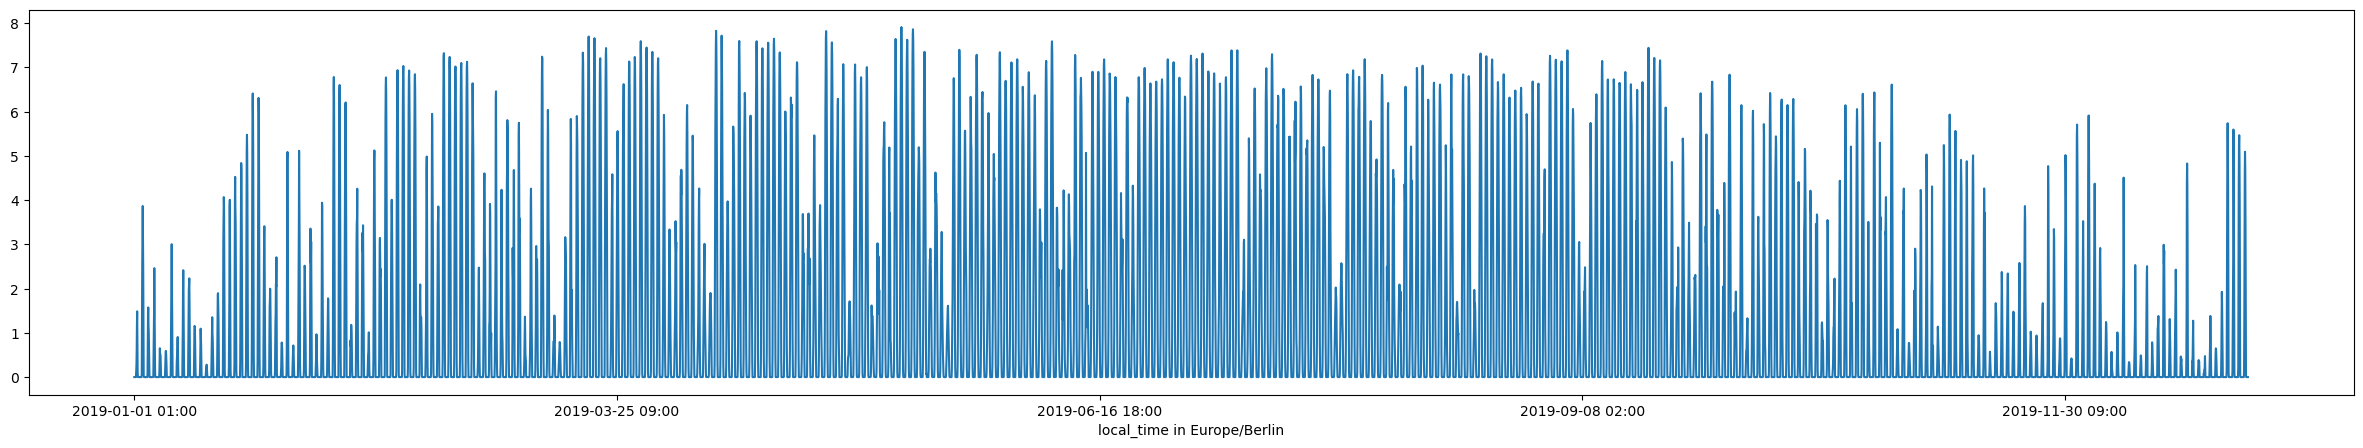

In [5]:
PV["electricityinkW"].plot(figsize = (30 ,5))

In [6]:
W = pd.read_csv("ninja_wind_49.0069_8.4034_corrected.csv", sep = ",")
W.set_index("local_time in Europe/Berlin", inplace = True)
W.head()

,time in UTC,electricityinkW
local_time in Europe/Berlin,,
2019-01-01 01:00,2019-01-01 00:00,1.038
2019-01-01 02:00,2019-01-01 01:00,1.184
2019-01-01 03:00,2019-01-01 02:00,1.402
2019-01-01 04:00,2019-01-01 03:00,1.574
2019-01-01 05:00,2019-01-01 04:00,1.776


<AxesSubplot:xlabel='local_time in Europe/Berlin'>

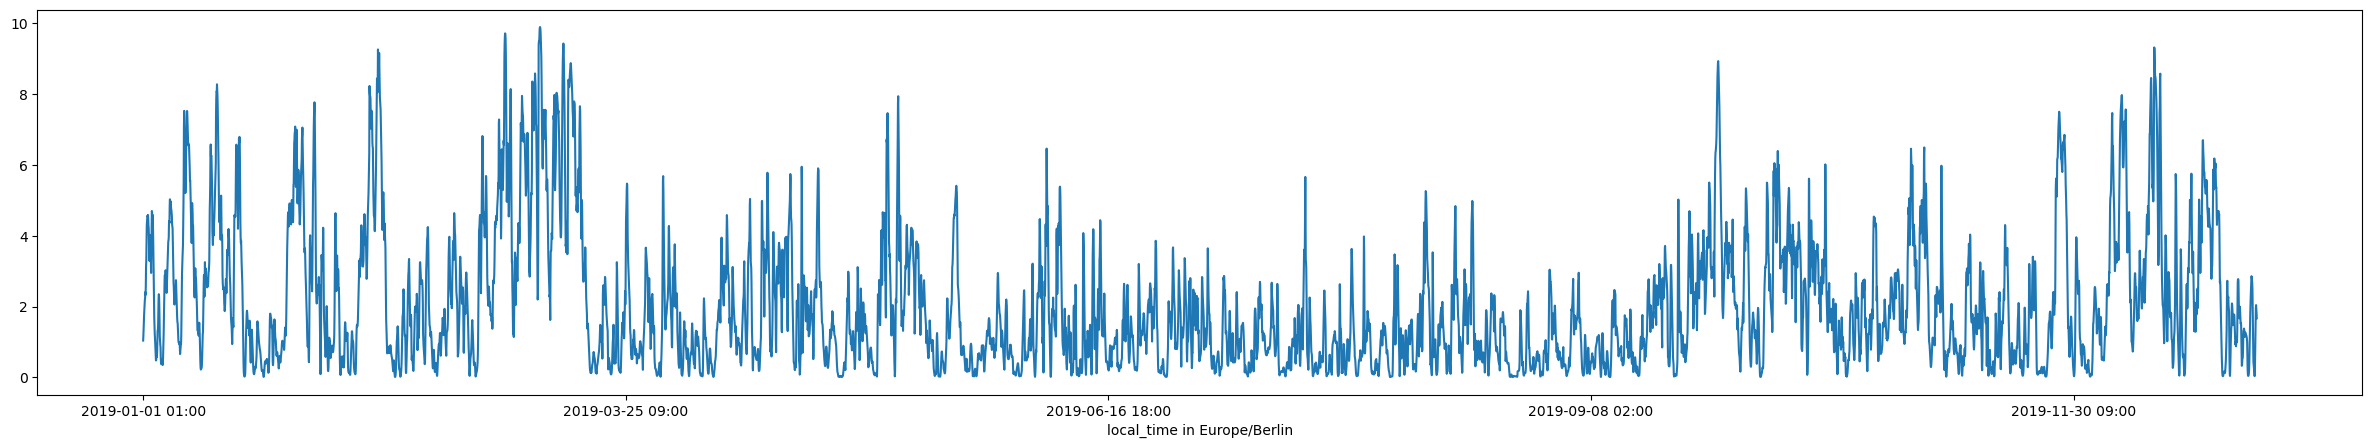

In [7]:
W["electricityinkW"].plot(figsize = (30 ,5))

In [8]:
t=0
n_timesteps = len(GHP)-1
Welectricity = np.array(W.electricityinkW)
PVelectricity = np.array(PV.electricityinkW)
GHPelectricity = np.array(GHP.DeutschlandLuxenburg)
income=0


In [9]:

while t<=n_timesteps:
    income = GHPelectricity[t]/1000 * PVelectricity[t] + GHPelectricity[t]/1000 * Welectricity[t] + income
    t += 1
  
print(round(income,2), "EUR")

1032.2 EUR


In [10]:
max(sum(Preis an der Börse[t]* Verkauf[t]))
s.t.
Speicher [0]=0
Speicher[t]<= 15
Laden[t]<=5
Laden[t]>=0
Speicher[t]>=0

Speicher[t]=Speicher[t-1]+Laden[t]*l
Verkauf[t]=(erzeugteLeistung[t]-(Speicher[t+1]-Speicher[t]))

Laden l ist eine Element von -1,0,1


Verkauf[t]=Leistung[t]*EntscheidungVerkauf + Speicher[t]
Verkauf[t]=Leistung[t]
Leistung[t]=Leistung[t-1]-Verkauf


SyntaxError: invalid syntax (3082386906.py, line 1)

In [20]:
m  = Model("DSM")  #Erstellt eine Instanz eines Gurobi-Gptimierungsmodells
m.setParam("OutputFlag",0)  #Kann auch deaktiviert werden

price = GHP[GHP.columns[2]].to_list()
genPV = PV[PV.columns[1]].to_list()
genW = W[W.columns[1]].to_list()

In [25]:

#Definitionen
storage = m.addVars(range(n_timesteps), vtype = GRB.CONTINUOUS, lb = 0, ub = 15, name = "Speicher") # lb = lower bound; ub = upper bound
laden = m.addVars(range(n_timesteps), vtype = GRB.CONTINUOUS, lb =-5, ub = 5, name = "Laden") # lb = lower bound; ub = upper bound
verkauf = m.addVars(range(n_timesteps), vtype = GRB.CONTINUOUS, lb = 0, name = "Verkauf") # lb = lower bound; ub = upper bound

#Zielfunktion

m.setObjective(( quicksum(price[t]/1000 * verkauf[t]  for t in range(n_timesteps) ) ), GRB.MAXIMIZE) #quicksum(... for t in range(start, end))  bildet die Summe über alle variablen von t=0 bis t=23


#Bedingungen
m.addConstrs( ((storage[t] == storage[t-1] + laden[t] )  for t in range(1,n_timesteps-1) ), "Speicher2") # Diese Nebenbedingung gilt für alle Zeitschritte
m.addConstrs( ((verkauf[t] == genPV[t] - laden[t]) for t in range(n_timesteps) ), "Verkauf2") # Diese Nebenbedingung funktioniert nicht im ersten und letzten Zeitschritt, da dann ein Index-Error aufkommen würde (es gibt keinen zeitschritt -1 und 24). Daher starten wir die range bei 1 und iterieren nur bis 22.

#Start- und Endbedingungen
m.addConstr(storage[0] == 0)


m.optimize()

In [26]:

#PV Optimum
m.getObjective().getValue()

533.9166342099995

In [21]:
#Definitionen
storage = m.addVars(range(n_timesteps), vtype = GRB.CONTINUOUS, lb = 0, ub = 15, name = "Speicher") # lb = lower bound; ub = upper bound
laden = m.addVars(range(n_timesteps), vtype = GRB.CONTINUOUS, lb =-5, ub = 5, name = "Laden") # lb = lower bound; ub = upper bound
verkauf = m.addVars(range(n_timesteps), vtype = GRB.CONTINUOUS, lb = 0, name = "Verkauf") # lb = lower bound; ub = upper bound

#Zielfunktion

m.setObjective(( quicksum(price[t]/1000 * verkauf[t]  for t in range(n_timesteps) ) ), GRB.MAXIMIZE) #quicksum(... for t in range(start, end))  bildet die Summe über alle variablen von t=0 bis t=23


#Bedingungen
m.addConstrs( ((storage[t] == storage[t-1] + laden[t] )  for t in range(1,n_timesteps-1) ), "Speicher2") # Diese Nebenbedingung gilt für alle Zeitschritte
m.addConstrs( ((verkauf[t] == genW[t] - laden[t]) for t in range(n_timesteps) ), "Verkauf2") # Diese Nebenbedingung funktioniert nicht im ersten und letzten Zeitschritt, da dann ein Index-Error aufkommen würde (es gibt keinen zeitschritt -1 und 24). Daher starten wir die range bei 1 und iterieren nur bis 22.

#Start- und Endbedingungen
m.addConstr(storage[0] == 0)


m.optimize()

In [22]:
#Wind Optimum
m.getObjective().getValue()

724.1259941300013